# Title:- Data Science Job Salaries

# Data Leading:-

Importing Required Libraries:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing the Dataset:

In [ ]:
data=pd.read_csv("/content/Data Science Job Salaries.csv")
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [ ]:
data.drop(columns="Unnamed: 0",inplace=True)

In [ ]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [ ]:
df=data.copy()

 # About Dataset

 Column Description:

    work_year:
    The year the salary was paid.

    experience_level:

    The experience level in the job during the year with the followingpossible values: EN Entry-level / Junior MI Mid-level / Intermediate
    SE Senior-level / Expert EX Executive-level / Director

    employment_type:
    The type of employement for the role: PT Part-time FT Full-time CTContract FL Freelance

    job_title:
    The role worked in during the year.

    salary:
    The total gross salary amount paid.

    salary_currency:
    The currency of the salary paid as an ISO 4217 currency code.

    salary_in_usd:
    The salary in USD (FX rate divided by avg. USD rate for the
    respective year via fxdata.foorilla.com).

    employee_residence:
    Employee's primary country of residence in during the work year as
    an ISO 3166 country code.

    remote_ratio:
    The overall amount of work done remotely, possible values are as
    follows: 0 No remote work (less than 20%) 50 Partially remote 100
    Fully remote (more than 80%)

    company_location:
    The country of the employer's main office or contracting branch as
    an ISO 3166 country code.

    company_size:
    The average number of people that worked for the company during
    the year: S less than 50 employees (small) M 50 to 250 employees
    (medium) L more than 250 employees (large)

# EDA & Data cleaning:

In [ ]:
df.head(3)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M


In [ ]:
df.info() #Information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [ ]:
#Checking for duplicate values:'
df.duplicated().sum()

np.int64(42)

In [ ]:
# Checking statistical paramenetrs:
df.describe().round()

,work_year,salary,salary_in_usd,remote_ratio
count,607.0,607.0,607.0,607.0
mean,2021.0,324000.0,112298.0,71.0
std,1.0,1544357.0,70957.0,41.0
min,2020.0,4000.0,2859.0,0.0
25%,2021.0,70000.0,62726.0,50.0
50%,2022.0,115000.0,101570.0,100.0
75%,2022.0,165000.0,150000.0,100.0
max,2022.0,30400000.0,600000.0,100.0


In [ ]:
# checking for categorical veriables:
for col in df.columns:
  if df[col].dtypes=="object":
    print(df[col].value_counts())
    print("-"*50)


experience_level
SE    280
MI    213
EN     88
EX     26
Name: count, dtype: int64
--------------------------------------------------
employment_type
FT    588
PT     10
CT      5
FL      4
Name: count, dtype: int64
--------------------------------------------------
job_title
Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Machine Learning Scientist                    8
Big Data Engineer                             8
Director of Data Science                      7
AI Scientist                                  7
Principal Data Scientist                      7
Data Science Consultant                       7
Data Analytics Manager                        7
BI Data Analyst                               6
Com

Conclusion:

In [ ]:
# No Null values.
# Duplicate values are present.
# No type error.
# Outliers present in selary sections.
# Havinf some issue with formatting as well.

# Data Pre-processing:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 565 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           565 non-null    int64 
 1   experience_level    565 non-null    object
 2   employment_type     565 non-null    object
 3   job_title           565 non-null    object
 4   salary              565 non-null    int64 
 5   salary_currency     565 non-null    object
 6   salary_in_usd       565 non-null    int64 
 7   employee_residence  565 non-null    object
 8   remote_ratio        565 non-null    int64 
 9   company_location    565 non-null    object
 10  company_size        565 non-null    object
dtypes: int64(4), object(7)
memory usage: 53.0+ KB


Duplicate Handing:

In [ ]:
# removing of duplicate values:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

 Removing outliers:

In [ ]:
cols=['salary','salary_in_usd']
from scipy import stats
scores=np.abs(stats.zscore(df[cols]))

In [ ]:
z_score=pd.DataFrame(scores,columns=cols)

In [ ]:
z_score # Calculatinf the z-scores

,salary,salary_in_usd
0,0.167734,0.426180
1,0.048869,2.068630
2,0.158350,0.021966
3,0.199014,1.254701
4,0.117686,0.545437
...,...,...
560,0.115183,0.600826
561,0.132700,0.213104
562,0.130823,0.254645
563,0.117686,0.545437


In [ ]:
df[(scores>3).any(axis=1)].shape #Outliers

(15, 11)

In [ ]:
df[~(scores>3).any(axis=1)].describe().round()

,work_year,salary,salary_in_usd,remote_ratio
count,550.0,550.0,550.0,550.0
mean,2021.0,193817.0,106422.0,70.0
std,1.0,454781.0,60440.0,41.0
min,2020.0,4000.0,2859.0,0.0
25%,2021.0,65180.0,60189.0,50.0
50%,2022.0,110000.0,100000.0,100.0
75%,2022.0,160000.0,148146.0,100.0
max,2022.0,4900000.0,325000.0,100.0


Besic Formatting:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 565 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           565 non-null    int64 
 1   experience_level    565 non-null    object
 2   employment_type     565 non-null    object
 3   job_title           565 non-null    object
 4   salary              565 non-null    int64 
 5   salary_currency     565 non-null    object
 6   salary_in_usd       565 non-null    int64 
 7   employee_residence  565 non-null    object
 8   remote_ratio        565 non-null    int64 
 9   company_location    565 non-null    object
 10  company_size        565 non-null    object
dtypes: int64(4), object(7)
memory usage: 53.0+ KB


In [ ]:
# Mapping directory
size={'S':'Small','M':'Medium','L':'Large'}

#Apply mapping
df['company_size']=df['company_size'].map(size)

In [ ]:
#Mapping directory
experience_mapping = {
    'EN': 'Entry-level',
    'MI': 'Mid-level',
    'SE': 'Senior-level',
    'EX': 'Executive-level'
}

# Apply mapping
df['experience_level'] = df['experience_level'].map(experience_mapping)

In [ ]:
# Mapping dictionary
employment_mapping = {
    'PT': 'Part-time',
    'FT': 'Full-time',
    'CT': 'Contract',
    'FL': 'Freelance'
}

# Apply mapping
df['employment_type'] = df['employment_type'].map(employment_mapping)

In [ ]:
df['salary_currency'].value_counts().index

Index(['USD', 'EUR', 'GBP', 'INR', 'CAD', 'JPY', 'PLN', 'TRY', 'HUF', 'MXN',
       'CNY', 'SGD', 'DKK', 'AUD', 'BRL', 'CLP', 'CHF'],
      dtype='object', name='salary_currency')

In [ ]:
currency_mapping = {
    'USD': 'US Dollar',
    'EUR': 'Euro',
    'GBP': 'British Pound',
    'INR': 'Indian Rupee',
    'CAD': 'Canadian Dollar',
    'JPY': 'Japanese Yen',
    'PLN': 'Polish Zloty',
    'TRY': 'Turkish Lira',
    'HUF': 'Hungarian Forint',
    'MXN': 'Mexican Peso',
    'CNY': 'Chinese Yuan',
    'SGD': 'Singapore Dollar',
    'DKK': 'Danish Krone',
    'AUD': 'Australian Dollar',
    'BRL': 'Brazilian Real',
    'CLP': 'Chilean Peso',
    'CHF': 'Swiss Franc'
}

# Apply mapping
df['salary_currency'] = df['salary_currency'].map(currency_mapping)


In [ ]:
df['employee_residence'].value_counts().index

Index(['US', 'GB', 'IN', 'CA', 'DE', 'FR', 'ES', 'GR', 'JP', 'PT', 'PK', 'BR',
       'NL', 'IT', 'RU', 'PL', 'AE', 'TR', 'AU', 'VN', 'AT', 'DK', 'NG', 'HU',
       'MX', 'SI', 'RO', 'BE', 'SG', 'PH', 'CN', 'HN', 'NZ', 'UA', 'IQ', 'CL',
       'MT', 'IR', 'CO', 'HR', 'BG', 'KE', 'MD', 'RS', 'HK', 'LU', 'JE', 'CZ',
       'PR', 'AR', 'DZ', 'MY', 'TN', 'EE', 'BO', 'IE', 'CH'],
      dtype='object', name='employee_residence')

In [ ]:
# Mapping dictionary
residence_mapping = {
    'US': 'United States',
    'GB': 'United Kingdom',
    'IN': 'India',
    'CA': 'Canada',
    'DE': 'Germany',
    'FR': 'France',
    'ES': 'Spain',
    'GR': 'Greece',
    'JP': 'Japan',
    'PT': 'Portugal',
    'PK': 'Pakistan',
    'BR': 'Brazil',
    'NL': 'Netherlands',
    'IT': 'Italy',
    'RU': 'Russia',
    'PL': 'Poland',
    'AE': 'United Arab Emirates',
    'TR': 'Turkey',
    'AU': 'Australia',
    'VN': 'Vietnam',
    'AT': 'Austria',
    'DK': 'Denmark',
    'NG': 'Nigeria',
    'HU': 'Hungary',
    'MX': 'Mexico',
    'SI': 'Slovenia',
    'RO': 'Romania',
    'BE': 'Belgium',
    'SG': 'Singapore',
    'PH': 'Philippines',
    'CN': 'China',
    'HN': 'Honduras',
    'NZ': 'New Zealand',
    'UA': 'Ukraine',
    'IQ': 'Iraq',
    'CL': 'Chile',
    'MT': 'Malta',
    'IR': 'Iran',
    'CO': 'Colombia',
    'HR': 'Croatia',
    'BG': 'Bulgaria',
    'KE': 'Kenya',
    'MD': 'Moldova',
    'RS': 'Serbia',
    'HK': 'Hong Kong',
    'LU': 'Luxembourg',
    'JE': 'Jersey',
    'CZ': 'Czech Republic',
    'PR': 'Puerto Rico',
    'AR': 'Argentina',
    'DZ': 'Algeria',
    'MY': 'Malaysia',
    'TN': 'Tunisia',
    'EE': 'Estonia',
    'BO': 'Bolivia',
    'IE': 'Ireland',
    'CH': 'Switzerland'
}

# Apply mapping
df['employee_residence'] = df['employee_residence'].map(residence_mapping)

In [ ]:
df['company_location'].value_counts().index

Index(['US', 'GB', 'CA', 'DE', 'IN', 'FR', 'ES', 'GR', 'JP', 'NL', 'PT', 'PL',
       'AT', 'MX', 'DK', 'AE', 'PK', 'LU', 'TR', 'BR', 'AU', 'RU', 'CN', 'CH',
       'BE', 'NG', 'SI', 'IT', 'CZ', 'NZ', 'HU', 'HN', 'SG', 'HR', 'MT', 'IL',
       'UA', 'RO', 'IQ', 'MD', 'CL', 'IR', 'VN', 'KE', 'CO', 'AS', 'DZ', 'EE',
       'MY', 'IE'],
      dtype='object', name='company_location')

In [ ]:
# Mapping dictionary
company_location_mapping = {
    'US': 'United States',
    'GB': 'United Kingdom',
    'CA': 'Canada',
    'DE': 'Germany',
    'IN': 'India',
    'FR': 'France',
    'ES': 'Spain',
    'GR': 'Greece',
    'JP': 'Japan',
    'NL': 'Netherlands',
    'PT': 'Portugal',
    'PL': 'Poland',
    'AT': 'Austria',
    'MX': 'Mexico',
    'DK': 'Denmark',
    'AE': 'United Arab Emirates',
    'PK': 'Pakistan',
    'LU': 'Luxembourg',
    'TR': 'Turkey',
    'BR': 'Brazil',
    'AU': 'Australia',
    'RU': 'Russia',
    'CN': 'China',
    'CH': 'Switzerland',
    'BE': 'Belgium',
    'NG': 'Nigeria',
    'SI': 'Slovenia',
    'IT': 'Italy',
    'CZ': 'Czech Republic',
    'NZ': 'New Zealand',
    'HU': 'Hungary',
    'HN': 'Honduras',
    'SG': 'Singapore',
    'HR': 'Croatia',
    'MT': 'Malta',
    'IL': 'Israel',
    'UA': 'Ukraine',
    'RO': 'Romania',
    'IQ': 'Iraq',
    'MD': 'Moldova',
    'CL': 'Chile',
    'IR': 'Iran',
    'VN': 'Vietnam',
    'KE': 'Kenya',
    'CO': 'Colombia',
    'AS': 'American Samoa',
    'DZ': 'Algeria',
    'EE': 'Estonia',
    'MY': 'Malaysia',
    'IE': 'Ireland'
}

# Apply mapping
df['company_location'] = df['company_location'].map(company_location_mapping)

In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid-level,Full-time,Data Scientist,70000,Euro,79833,Germany,0,Germany,Large
1,2020,Senior-level,Full-time,Machine Learning Scientist,260000,US Dollar,260000,Japan,0,Japan,Small
2,2020,Senior-level,Full-time,Big Data Engineer,85000,British Pound,109024,United Kingdom,50,United Kingdom,Medium
3,2020,Mid-level,Full-time,Product Data Analyst,20000,US Dollar,20000,Honduras,0,Honduras,Small
4,2020,Senior-level,Full-time,Machine Learning Engineer,150000,US Dollar,150000,United States,50,United States,Large


Saving the cleaned data:

In [ ]:
df=df[~(scores>3).any(axis=1)]

In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid-level,Full-time,Data Scientist,70000,Euro,79833,Germany,0,Germany,Large
1,2020,Senior-level,Full-time,Machine Learning Scientist,260000,US Dollar,260000,Japan,0,Japan,Small
2,2020,Senior-level,Full-time,Big Data Engineer,85000,British Pound,109024,United Kingdom,50,United Kingdom,Medium
3,2020,Mid-level,Full-time,Product Data Analyst,20000,US Dollar,20000,Honduras,0,Honduras,Small
4,2020,Senior-level,Full-time,Machine Learning Engineer,150000,US Dollar,150000,United States,50,United States,Large


In [ ]:
df.to_csv('cleaned_data.csv', index=False)

# Data Analysis:

Business Problems:

In [ ]:
# - How do salaries vary across different experience levels (Entry, Mid, Senior, Executive) in the data science field?
#- What is the impact of employment type (Full-time, Part-time, Contract, Freelance) on salary levels?
#- Which job titles command the highest average salaries, and how do they differ across regions?
#- How does company size (Small, Medium, Large) influence salary distribution for data science roles?
#- What role does remote work ratio (on-site, hybrid, fully remote) play in determining salary levels?
#- How do salaries differ across employee residence vs. company location (cross-country comparison)?
#- What are the key predictors of salary in USD, and can we build a model to estimate salaries based on job-related factors?

In [ ]:
df=pd.read_csv('/content/Cleaned_Data Science Job salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid-level,Full-time,Data Scientist,70000,Euro,79833,Germany,0,Germany,Large
1,2020,Senior-level,Full-time,Machine Learning Scientist,260000,US Dollar,260000,Japan,0,Japan,Small
2,2020,Senior-level,Full-time,Big Data Engineer,85000,British Pound,109024,United Kingdom,50,United Kingdom,Medium
3,2020,Mid-level,Full-time,Product Data Analyst,20000,US Dollar,20000,Honduras,0,Honduras,Small
4,2020,Senior-level,Full-time,Machine Learning Engineer,150000,US Dollar,150000,United States,50,United States,Large


In [ ]:
# - How do salaries vary across different experience levels (Entry, Mid, Senior, Executive) in the data science field?
sal_vs_exp=df.groupby('experience_level')['salary'].mean().reset_index()
sal_vs_exp.sort_values(by='salary')

,experience_level,salary
1,Executive-level,4087875
0,Entry-level,23286776
2,Mid-level,32703808
3,Senior-level,46521073


In [ ]:
df['experience_level'].value_counts()

,count
experience_level,
Senior-level,239
Mid-level,200
Entry-level,88
Executive-level,23


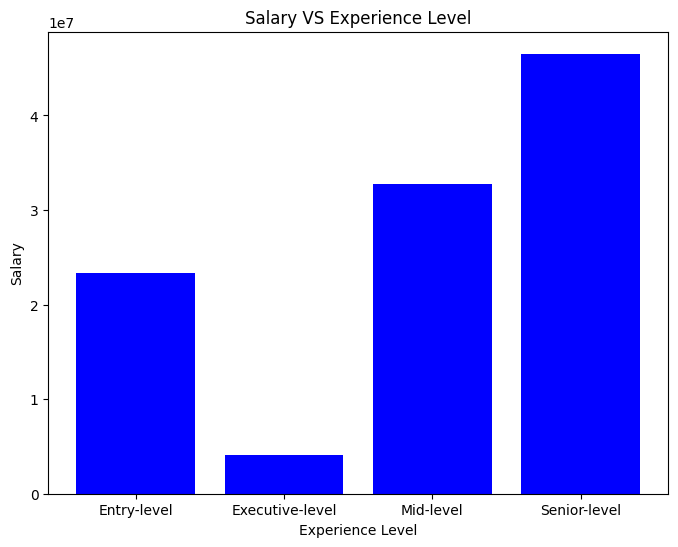

In [ ]:
plt.figure(figsize=(8,6))
plt.title("Salary VS Experience Level")

plt.bar(sal_vs_exp['experience_level'],sal_vs_exp['salary'],color='b')
plt.xlabel('Experience Level')
plt.ylabel('Salary')
plt.show()

In [ ]:
#- What is the impact of employment type (Full-time, Part-time, Contract, Freelance) on salary levels?
emptype_vs_salary=df.groupby(['employment_type'])['salary'].sum().reset_index()
emptype_vs_salary.sort_values(by='salary')

,employment_type,salary
1,Freelance,192000
0,Contract,504000
3,Part-time,854760
2,Full-time,105048772


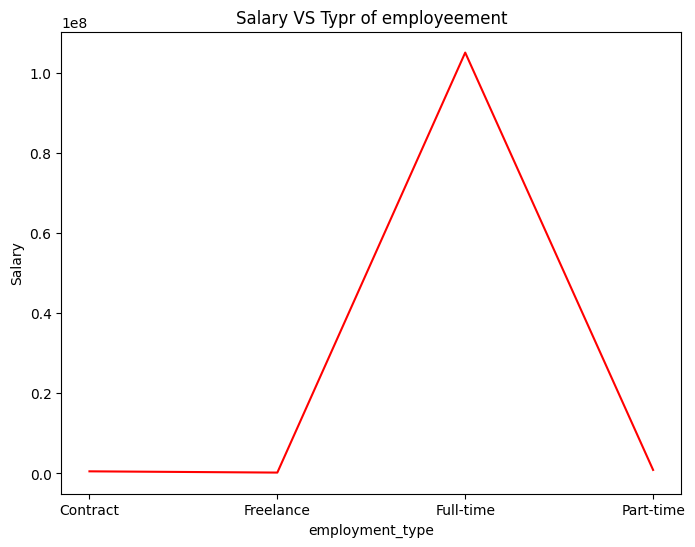

In [ ]:
plt.figure(figsize=(8,6))
plt.title("Salary VS Typr of employeement")

plt.plot(emptype_vs_salary['employment_type'],emptype_vs_salary['salary'],color='r')
plt.xlabel('employment_type')
plt.ylabel('Salary')
plt.show()

In [ ]:
#- Which job titles command the highest average salaries, and how do they differ across regions?
jobtitle_vs_salary=df.groupby(['job_title'])['salary'].mean().reset_index()
round(jobtitle_vs_salary).sort_values(by='salary')

,job_title,salary
26,Finance Data Analyst,45000.0
4,Applied Machine Learning Scientist,47467.0
25,ETL Developer,50000.0
13,Data Analytics Engineer,61750.0
40,Marketing Data Analyst,75000.0
33,Lead Machine Learning Engineer,80000.0
5,BI Data Analyst,82454.0
10,Computer Vision Engineer,83500.0
19,Data Science Engineer,84500.0
46,Research Scientist,87860.0


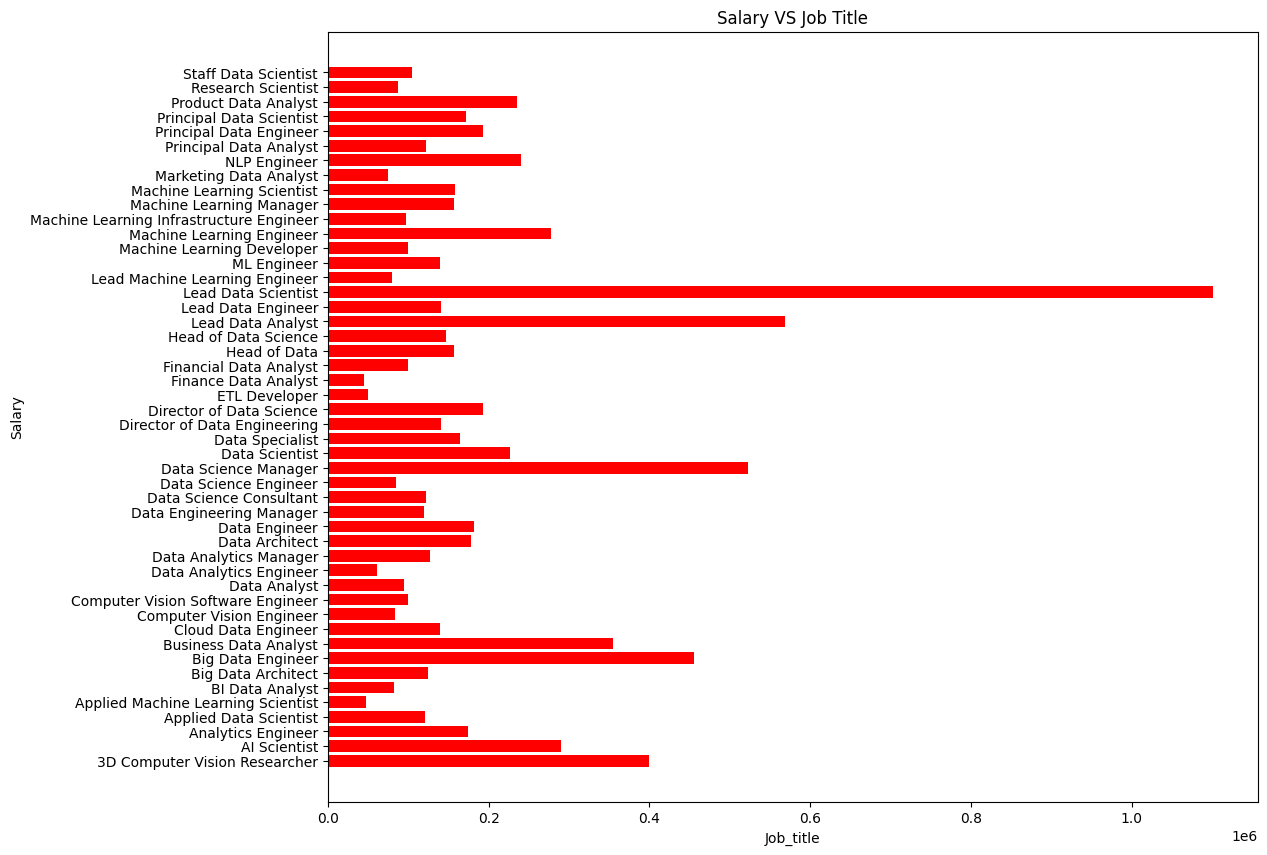

In [ ]:
plt.figure(figsize=(12,10))
plt.title("Salary VS Job Title")

plt.barh(jobtitle_vs_salary['job_title'],jobtitle_vs_salary['salary'],color='r')
plt.xlabel('Job_title')
plt.ylabel('Salary')
plt.show()

In [ ]:
#- How does company size (Small, Medium, Large) influence salary distribution for data science roles?
companysize_vs_salary=df.groupby(['company_size'])['salary'].mean().reset_index()
round(companysize_vs_salary).sort_values(by='salary')

,company_size,salary
1,Medium,147137.0
2,Small,194632.0
0,Large,267587.0


In [ ]:
df.groupby(['company_size'])['job_title'].count()

,job_title
company_size,
Large,182
Medium,289
Small,79


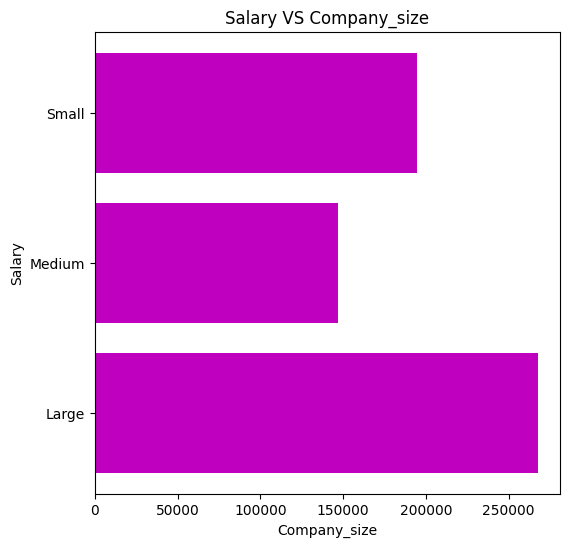

In [ ]:
plt.figure(figsize=(6,6))
plt.title("Salary VS Company_size")

plt.barh(companysize_vs_salary['company_size'],companysize_vs_salary['salary'],color='m')
plt.xlabel('Company_size')
plt.ylabel('Salary')
plt.show()

In [ ]:
#- How do salaries differ across employee residence vs. company location (cross-country comparison)?
location_vs_salary=df.groupby(['company_location'])['salary'].sum().reset_index()
round(location_vs_salary).sort_values(by='salary')

,company_location,salary
18,Iran,4000
47,Vietnam,4000
24,Kenya,9272
43,Ukraine,13400
29,Moldova,18000
16,Honduras,20000
8,Colombia,21844
27,Malta,24000
12,Estonia,30000
33,Pakistan,40000


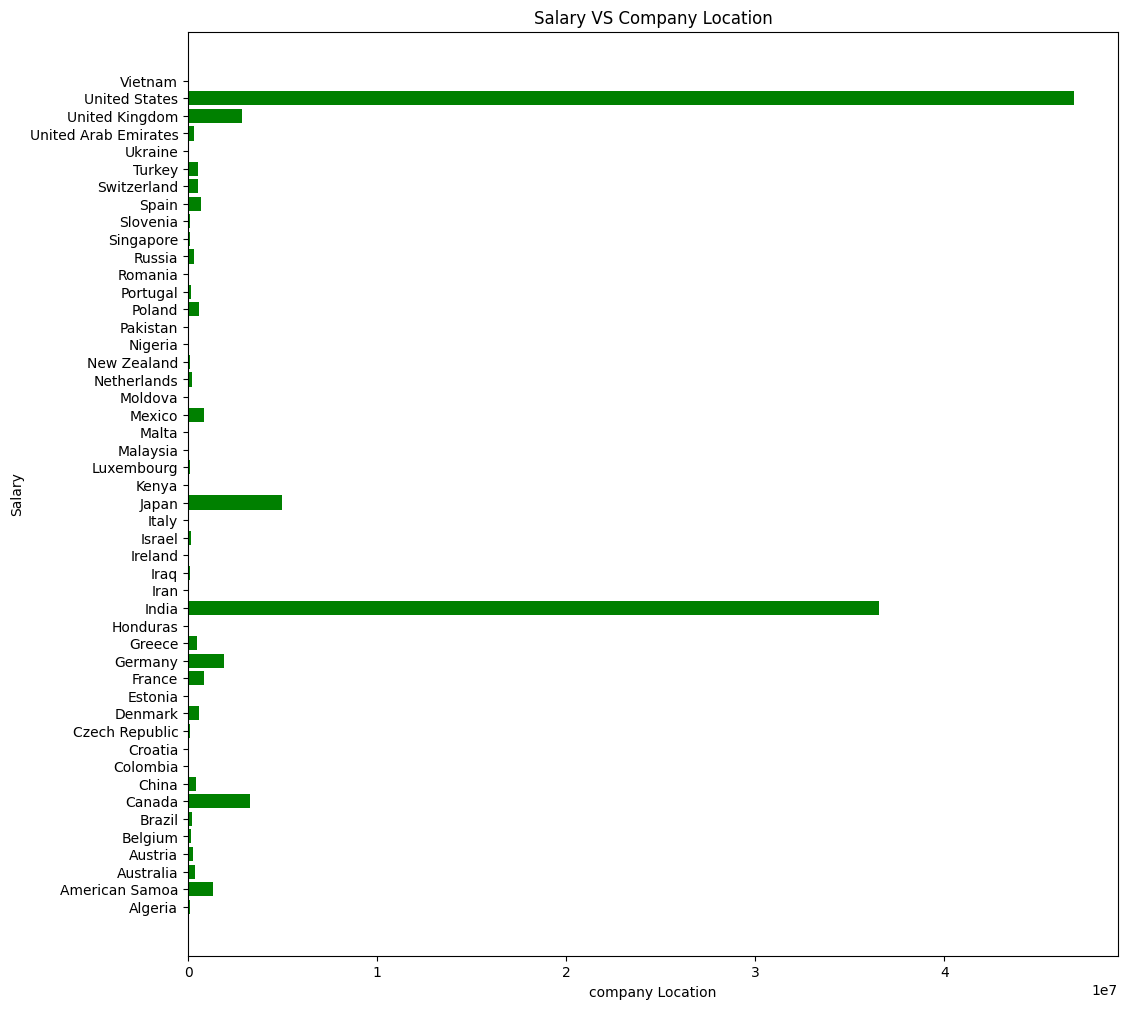

In [ ]:
plt.figure(figsize=(12,12))
plt.title("Salary VS Company Location")

plt.barh(location_vs_salary['company_location'],location_vs_salary['salary'],color='g')
plt.xlabel('company Location')
plt.ylabel('Salary')
plt.show()

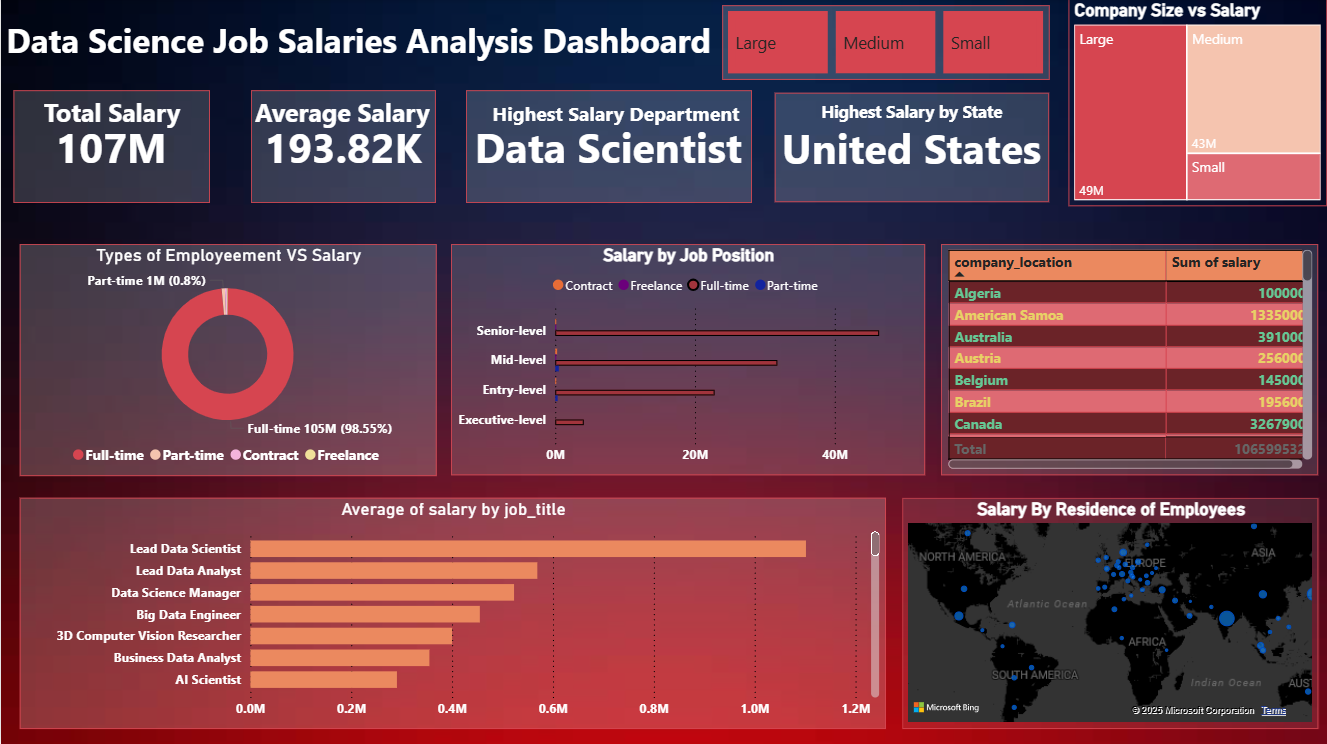

In [ ]:
# ALL the visualizations are also represented throughj powerbi dashboard as well.

In [ ]:
# There is large investment for the "Senior level" , also the no. of employees are also high.
# As practical company invests large scale amount for Full time employees and minimum for freelancers.
# Lead Data Scientists having highest Salary packages for large companies.
# Large Companies invest more for their employees and medium companies invest less.
# Small level companis have higher number of roles in data engineering field.
# India have larger number of employees in terms of middle level companies.

# Predictive Modeling Using ML.

In [ ]:
df=pd.read_csv('/content/Cleaned_Data Science Job salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid-level,Full-time,Data Scientist,70000,Euro,79833,Germany,0,Germany,Large
1,2020,Senior-level,Full-time,Machine Learning Scientist,260000,US Dollar,260000,Japan,0,Japan,Small
2,2020,Senior-level,Full-time,Big Data Engineer,85000,British Pound,109024,United Kingdom,50,United Kingdom,Medium
3,2020,Mid-level,Full-time,Product Data Analyst,20000,US Dollar,20000,Honduras,0,Honduras,Small
4,2020,Senior-level,Full-time,Machine Learning Engineer,150000,US Dollar,150000,United States,50,United States,Large


Splitting of data:

In [ ]:
x=df.drop(columns='salary_in_usd')
y=df['salary_in_usd']

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           550 non-null    int64 
 1   experience_level    550 non-null    object
 2   employment_type     550 non-null    object
 3   job_title           550 non-null    object
 4   salary              550 non-null    int64 
 5   salary_currency     550 non-null    object
 6   employee_residence  550 non-null    object
 7   remote_ratio        550 non-null    int64 
 8   company_location    550 non-null    object
 9   company_size        550 non-null    object
dtypes: int64(3), object(7)
memory usage: 43.1+ KB


# Feature Engineering:

Feature Transformation:

In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le=LabelEncoder()

In [ ]:
# Label Encoding for ordinal columns:
le_cols=['experience_level','employment_type','company_size']
for col in le_cols:
  x[col]=le.fit_transform(x[col])

In [ ]:
# Target Encoding for for nominal features:
t_cols=['job_title','salary_currency','employee_residence','company_location']
for col in t_cols:
  dictionary=df.groupby(col)['salary_in_usd'].mean().to_dict()
  x[col]=x[col].map(dictionary)

In [ ]:
x

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size
0,2020,2,2,101936.637795,70000,65598.913978,85336.666667,0,81559.555556,0
1,2020,3,2,158412.500000,260000,130055.954416,116737.800000,0,135922.250000,2
2,2020,3,2,51974.000000,85000,81744.116279,81470.069767,50,81649.500000,1
3,2020,2,2,13036.000000,20000,130055.954416,20000.000000,0,20000.000000,2
4,2020,3,2,101165.128205,150000,130055.954416,141958.191638,50,136934.993528,0
...,...,...,...,...,...,...,...,...,...,...
545,2022,3,2,109750.033058,154000,130055.954416,141958.191638,100,136934.993528,1
546,2022,3,2,109750.033058,126000,130055.954416,141958.191638,100,136934.993528,1
547,2022,3,2,90089.597561,129000,130055.954416,141958.191638,0,136934.993528,1
548,2022,3,2,90089.597561,150000,130055.954416,141958.191638,100,136934.993528,1


Feature Selection:

In [ ]:
#Using VIF Method:
from statsmodels.stats.outliers_influence import variance_inflation_factor
scores=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
series=pd.Series(scores,index=x.columns)

In [ ]:
series.sort_values(ascending=False)

,0
work_year,109.676627
employment_type,75.499054
company_location,42.092364
employee_residence,38.269663
salary_currency,32.273077
job_title,16.147582
experience_level,5.466715
remote_ratio,4.031193
company_size,2.591832
salary,1.438461


In [ ]:
imp_cols=series.sort_values(ascending=False)[:5].index
imp_cols

Index(['work_year', 'employment_type', 'company_location',
       'employee_residence', 'salary_currency'],
      dtype='object')

In [ ]:
x=x[imp_cols] #Fetching the imp cols

In [ ]:
x.head()

,work_year,employment_type,company_location,employee_residence,salary_currency
0,2020,2,81559.555556,85336.666667,65598.913978
1,2020,2,135922.250000,116737.800000,130055.954416
2,2020,2,81649.500000,81470.069767,81744.116279
3,2020,2,20000.000000,20000.000000,130055.954416
4,2020,2,136934.993528,141958.191638,130055.954416


In [ ]:
y.head()

,salary_in_usd
0,79833
1,260000
2,109024
3,20000
4,150000


Feature Scaling:

In [ ]:
x.describe().round()

,work_year,employment_type,company_location,employee_residence,salary_currency
count,550.0,550.0,550.0,550.0,550.0
mean,2021.0,2.0,106422.0,106422.0,106422.0
std,1.0,0.0,39708.0,41808.0,34274.0
min,2020.0,0.0,4000.0,4000.0,15904.0
25%,2021.0,2.0,81560.0,72333.0,81744.0
50%,2022.0,2.0,136935.0,141958.0,130056.0
75%,2022.0,2.0,136935.0,141958.0,130056.0
max,2022.0,3.0,157500.0,200000.0,130056.0


In [ ]:
sc_cols=["company_location","employee_residence","salary_currency"]

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x[sc_cols]=sc.fit_transform(x[sc_cols])

/tmp/ipython-input-2215867529.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[sc_cols]=sc.fit_transform(x[sc_cols])


In [ ]:
x

,work_year,employment_type,company_location,employee_residence,salary_currency
0,2020,2,-0.626691,-0.504795,-1.192162
1,2020,2,0.743600,0.246971,0.690191
2,2020,2,-0.624424,-0.597364,-0.720670
3,2020,2,-2.178390,-2.069001,0.690191
4,2020,2,0.769128,0.850765,0.690191
...,...,...,...,...,...
545,2022,2,0.769128,0.850765,0.690191
546,2022,2,0.769128,0.850765,0.690191
547,2022,2,0.769128,0.850765,0.690191
548,2022,2,0.769128,0.850765,0.690191


In [ ]:
x.describe().round()

,work_year,employment_type,company_location,employee_residence,salary_currency
count,550.0,550.0,550.0,550.0,550.0
mean,2021.0,2.0,-0.0,-0.0,-0.0
std,1.0,0.0,1.0,1.0,1.0
min,2020.0,0.0,-3.0,-2.0,-3.0
25%,2021.0,2.0,-1.0,-1.0,-1.0
50%,2022.0,2.0,1.0,1.0,1.0
75%,2022.0,2.0,1.0,1.0,1.0
max,2022.0,3.0,1.0,2.0,1.0


# Cross Validation:

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [ ]:
x_train

,work_year,employment_type,company_location,employee_residence,salary_currency
182,2021,2,-2.131910,-2.024855,0.690191
124,2021,2,-2.095601,-1.738991,-2.435059
393,2022,2,0.769128,0.850765,0.690191
225,2021,2,-0.158801,-0.220979,-0.268640
235,2021,2,-1.070045,-1.114087,-1.192162
...,...,...,...,...,...
71,2021,2,0.769128,0.850765,0.690191
106,2021,2,-0.624424,-0.597364,-0.720670
270,2021,0,0.769128,0.850765,0.690191
435,2022,2,0.769128,0.850765,0.690191


In [ ]:
y_train

,salary_in_usd
182,21844
124,40570
393,241000
225,63810
235,36643
...,...
71,235000
106,113476
270,105000
435,100000


In [ ]:
x_test

,work_year,employment_type,company_location,employee_residence,salary_currency
195,2021,2,0.769128,0.850765,0.690191
79,2021,2,-0.158801,-0.597364,-0.268640
480,2022,2,-2.346433,-1.890336,0.690191
109,2021,2,-1.297531,-1.088471,-1.192162
522,2022,2,-0.624424,-0.597364,-0.720670
...,...,...,...,...,...
398,2022,2,0.769128,0.850765,0.690191
69,2021,2,-0.624424,-0.597364,-0.720670
261,2021,2,-1.070045,-1.114087,-1.192162
517,2022,2,0.769128,0.850765,0.690191


In [ ]:
y_test

,salary_in_usd
195,160000
79,54238
480,20000
109,45391
522,65438
...,...
398,100800
69,82528
261,77684
517,184700


# Model Training :

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize models
lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()
rf = RandomForestRegressor(random_state=42)

models = {
    'Linear Regression': lr,
    'Ridge': ridge,
    'Lasso': lasso,
    'Random Forest': rf
}

results = {}

for name, model in models.items():
    # Train the model
    model.fit(x_train, y_train)

    # Make predictions
    y_pred = model.predict(x_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'MAE': mae, 'MSE': mse, 'R-squared': r2}

# Display results
for name, metrics in results.items():
    print(f"--- {name} ---")
    print(f"MAE: {metrics['MAE']:.2f}")
    print(f"MSE: {metrics['MSE']:.2f}")
    print(f"R-squared: {metrics['R-squared']:.2f}")
    print("-" * (len(name) + 6))

--- Linear Regression ---
MAE: 34041.63
MSE: 2194175819.67
R-squared: 0.41
-----------------------
--- Ridge ---
MAE: 34046.37
MSE: 2193325272.39
R-squared: 0.41
-----------
--- Lasso ---
MAE: 34041.40
MSE: 2194102754.91
R-squared: 0.41
-----------
--- Random Forest ---
MAE: 36792.96
MSE: 2604262291.43
R-squared: 0.30
-------------------


# Optimal Selection:

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_model=DecisionTreeRegressor(max_depth=9)

In [ ]:
tree_model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=9)

# Model Testing & Evaluation:

In [ ]:
tree_model.score(x_train,y_train)

0.5915566819492762